In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

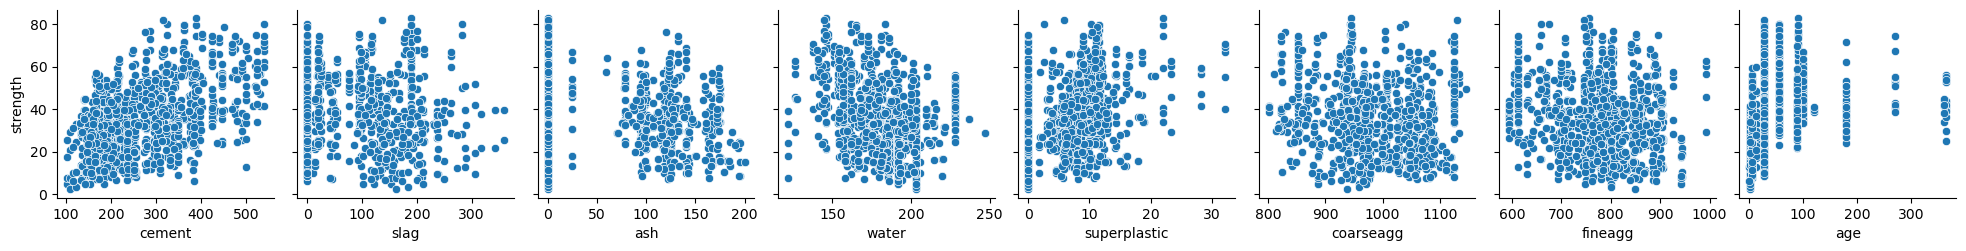

In [5]:
sns.pairplot(data=data, y_vars=data.columns[-1], x_vars=data.columns[:-1])

<Axes: >

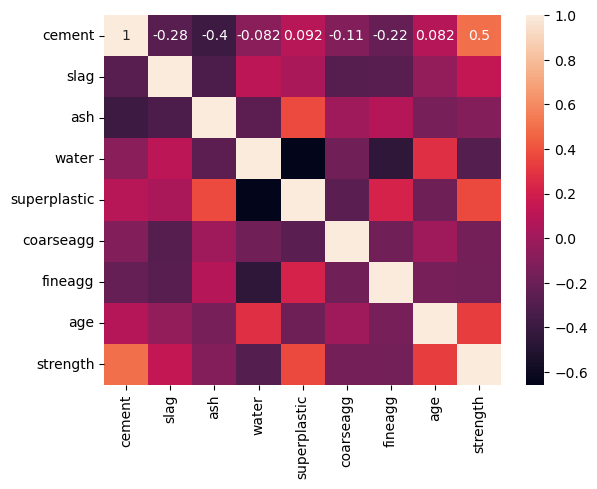

In [6]:
sns.heatmap(data=data.corr(), annot=True)

In [7]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
def norm_func(i):
     x = (i-i.min())	/	(i.max()	-	i.min())
     return (x)
data = norm_func(data)

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape, y.shape

((1030, 8), (1030,))

In [10]:
x

array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

In [11]:
y

array([0.96748474, 0.74199576, 0.47265479, ..., 0.26622649, 0.37922013,
       0.37461069])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_test

(array([[ 1.91868084, -0.88106284, -0.8461832 , ..., -0.46017905,
         -0.64352249, -0.2880169 ],
        [ 0.91473491, -0.88106284, -0.8461832 , ...,  0.85205772,
         -0.18717261, -0.2880169 ],
        [ 0.23205168,  0.70441979, -0.8461832 , ..., -0.98121424,
         -0.62502182, -0.2880169 ],
        ...,
        [-1.29394613, -0.88106284,  1.86833172, ..., -0.37012359,
          0.87353254, -0.2880169 ],
        [-0.37987726,  3.19200689, -0.8461832 , ..., -0.38813468,
         -1.34284786, -0.2880169 ],
        [-0.83499942,  2.38283277, -0.8461832 , ..., -0.53994246,
         -0.70395802,  0.71554384]]),
 array([[ 2.10990863, -0.88106284, -0.8461832 , ...,  1.97131849,
         -1.97557082, -0.69267849],
        [-1.49855987,  1.2030705 , -0.8461832 , ..., -0.17457458,
          0.33207956, -0.62793264],
        [ 0.79617368,  1.26086866, -0.8461832 , ..., -0.34825297,
         -0.21430692,  0.7317303 ],
        ...,
        [-1.01188513, -0.313281  ,  1.84506445, ...,  

In [14]:
def prep_model(hidden_dim):
    model = tf.keras.models.Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(tf.keras.layers.Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(tf.keras.layers.Dense(hidden_dim[i],activation="relu"))
    model.add(tf.keras.layers.Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [15]:
first_model = prep_model([8,50,1])
first_model.fit(np.array(X_train),np.array(Y_train),epochs=900)

Epoch 1/900


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.0024 - loss: 0.1296    
Epoch 2/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.0010 - loss: 0.0368  
Epoch 3/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.0035 - loss: 0.0274  
Epoch 4/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.0023 - loss: 0.0207  
Epoch 5/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.0057 - loss: 0.0191  
Epoch 6/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.0038 - loss: 0.0153  
Epoch 7/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.0025 - loss: 0.0126  
Epoch 8/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.0014 - loss: 0.0112  
Epoch 9/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.0020 - loss: 0.0101  
Epoch 10/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 6.4567e-04 - loss: 0.0095
Epoch 11/900
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.0023 - loss: 0.0088  
Epoch 12/900
26/26 ━━━━━━━━

In [16]:
first_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

In [17]:
pred_train = first_model.predict(np.array(X_train))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-Y_train)**2))#0.2905992907837768
print(rmse_value)
print(np.corrcoef(pred_train,Y_train)) ##0.97436919

 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
0.031835871147194626
[[1.        0.9884957]
 [0.9884957 1.       ]]


In [18]:
pred_train.shape, Y_train.shape

((824,), (824,))

In [19]:
rms_loss = 0
for actual, expected in zip(pred_train, Y_train):
    rms_loss += abs(actual - expected)**2
rms_loss = np.sqrt(rms_loss / len(pred_train))
print(rms_loss)

0.031835871147194626


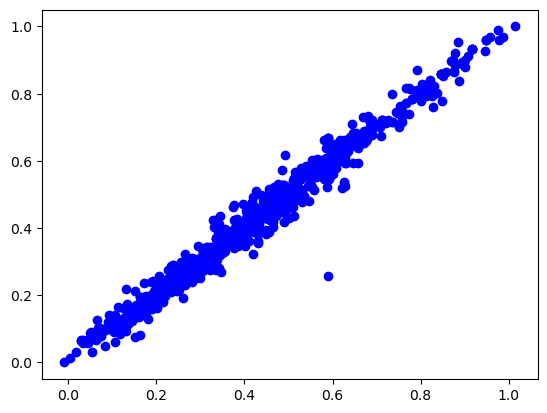

In [20]:
plt.plot(pred_train,Y_train,"bo")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
0.06461145764621344
[[1.         0.95165059]
 [0.95165059 1.        ]]


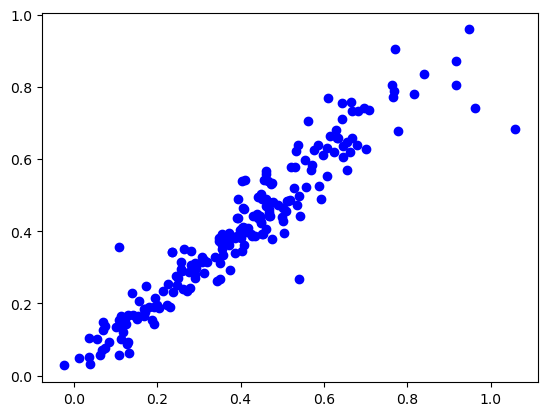

In [21]:
pred_test = first_model.predict(X_test)
pred_test = np.array([i[0] for i in pred_test])
rmse_value = np.sqrt(np.mean((pred_test-Y_test)**2))
print(rmse_value)
print(np.corrcoef(pred_test,Y_test))
plt.plot(pred_test,Y_test, "bo")
